In [19]:
!wget "https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-256.pth?OSSAccessKeyId=LTAI4G6bfnyW4TA4wFUXTYBe&Expires=1961116259&Signature=kMGJLSHqnvzzzqwtjUVBgngzX2s%3D" -O weights/GPEN-BFR-256.pth
!wget "https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-256-D.pth?OSSAccessKeyId=LTAI4G6bfnyW4TA4wFUXTYBe&Expires=1961116288&Signature=b7NCfHFzyqKh%2BfaLrRCwMIIZ2HA%3D" -O weights/GPEN-BFR-256-D.pth

--2022-04-20 01:12:24--  https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-256.pth?OSSAccessKeyId=LTAI4G6bfnyW4TA4wFUXTYBe&Expires=1961116259&Signature=kMGJLSHqnvzzzqwtjUVBgngzX2s%3D
Resolving public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-vigen-video.oss-cn-shanghai.aliyuncs.com)... 47.101.88.25
Connecting to public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-vigen-video.oss-cn-shanghai.aliyuncs.com)|47.101.88.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75573183 (72M) [application/octet-stream]
Saving to: ‘weights/GPEN-BFR-256.pth’

weights/GPEN-BFR-25 100%[===================>]  72.07M   963KB/s    in 1m 46s  

2022-04-20 01:14:27 (694 KB/s) - ‘weights/GPEN-BFR-256.pth’ saved [75573183/75573183]

--2022-04-20 01:14:28--  https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-256-D.pth?OSSAccessKeyId=LTAI4G6bfnyW4TA4wFUXTYBe&Expires=1961116288&Signature=b7NCfHFzyqKh%2BfaLrRCwMIIZ2HA%3D
Re

In [1]:
!python train_simple_mod.py --size 256 --channel_multiplier 1 --narrow 0.5 --ckpt weights --sample results --batch 1 --path images1024x1024 --save_freq 100 --pretrain /weights --g_reg_every 16

train_simple_mod.py:60: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  par1[k].data.mul_(decay).add_(1 - decay, par2[k].data)
load model: /weights
Loading ResNet ArcFace
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /root/GPEN/training/lpips/weights/v0.1/alex.pth
d: 4.2158; g: 2.8769; r1: 0.0052; :   0%|           | 0/4000000 [00:06<?, ?it/s]0/4000000: lpips: 0.15748633444309235
d: 1.3908; g: 1.4174; r1: 0.0002; :   0%| | 100/4000000 [01:06<730:42:56,  1.52i100/4000000: lpips: 0.15932902693748474
d: 1.3945; g: 0.9606; r1: 0.0005; :   0%| | 200/4000000 [02:06<691:02:01,  1.61i200/4000000: lpips: 0.16381976008415222
d: 1.3800; g: 1.1660; r1: 0.0018; :   0%| | 300/4000000 [03:07<672:07:35,  1.65i300/4000000: lpips: 0.17002278566360474


In [2]:
!python train_simple_mod.py --size 512 --channel_multiplier 2 --narrow 1 --ckpt weights --sample results --batch 1 --path images1024x1024 --pretrain weights/002400.pth --save_freq 10000

train_simple_mod.py:61: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  par1[k].data.mul_(decay).add_(1 - decay, par2[k].data)
load model: weights/002400.pth
Loading ResNet ArcFace
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /root/GPEN/training/lpips/weights/v0.1/alex.pth
d: 1.3675; g: 1.1102; :   0%|         | 157/4000000 [01:44<739:46:00,  1.50it/s]
Traceback (most recent call last):
  File "train_simple_mod.py", line 427, in <module>
    train(args, loader, generator, discriminator, [smooth_l1_loss, id_loss], g_optim, d_optim, g_ema, lpips_func, device)
  File "train_simple_mod.py", line 221, in train
    g_optim.step()
  File "/opt/conda/envs/KLTN_env/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 26, in decorat

In [1]:
!nvidia-smi

Wed Apr 27 14:35:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3070    Off  | 00000000:01:00.0 Off |                  N/A |
| 64%   51C    P2    49W / 240W |    501MiB /  7979MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import torch
ckpt = torch.load("weights/GPEN-BFR-256-D.pth")

In [2]:
import __init_paths
from training.data_loader.dataset_face import FaceDataset
from face_model.gpen_model import FullGenerator, Discriminator

In [3]:
discriminator = Discriminator(
        256, channel_multiplier=1, narrow=1, device="cuda"
    ).to("cuda")

In [4]:
discriminator.load_state_dict(ckpt)

<All keys matched successfully>

In [5]:
discriminator.state_dict().keys()

odict_keys(['convs.0.0.weight', 'convs.0.1.bias', 'convs.1.conv1.0.weight', 'convs.1.conv1.1.bias', 'convs.1.conv2.0.kernel', 'convs.1.conv2.1.weight', 'convs.1.conv2.2.bias', 'convs.1.skip.0.kernel', 'convs.1.skip.1.weight', 'convs.2.conv1.0.weight', 'convs.2.conv1.1.bias', 'convs.2.conv2.0.kernel', 'convs.2.conv2.1.weight', 'convs.2.conv2.2.bias', 'convs.2.skip.0.kernel', 'convs.2.skip.1.weight', 'convs.3.conv1.0.weight', 'convs.3.conv1.1.bias', 'convs.3.conv2.0.kernel', 'convs.3.conv2.1.weight', 'convs.3.conv2.2.bias', 'convs.3.skip.0.kernel', 'convs.3.skip.1.weight', 'convs.4.conv1.0.weight', 'convs.4.conv1.1.bias', 'convs.4.conv2.0.kernel', 'convs.4.conv2.1.weight', 'convs.4.conv2.2.bias', 'convs.4.skip.0.kernel', 'convs.4.skip.1.weight', 'convs.5.conv1.0.weight', 'convs.5.conv1.1.bias', 'convs.5.conv2.0.kernel', 'convs.5.conv2.1.weight', 'convs.5.conv2.2.bias', 'convs.5.skip.0.kernel', 'convs.5.skip.1.weight', 'convs.6.conv1.0.weight', 'convs.6.conv1.1.bias', 'convs.6.conv2.0.ker

In [6]:
len(discriminator.convs)

7

In [5]:
discriminator.convs

Sequential(
  (0): ConvLayer(
    (0): EqualConv2d(3, 64, 1, stride=1, padding=0)
    (1): FusedLeakyReLU()
  )
  (1): ResBlock(
    (conv1): ConvLayer(
      (0): EqualConv2d(64, 64, 3, stride=1, padding=1)
      (1): FusedLeakyReLU()
    )
    (conv2): ConvLayer(
      (0): Blur()
      (1): EqualConv2d(64, 128, 3, stride=2, padding=0)
      (2): FusedLeakyReLU()
    )
    (skip): ConvLayer(
      (0): Blur()
      (1): EqualConv2d(64, 128, 1, stride=2, padding=0)
    )
  )
  (2): ResBlock(
    (conv1): ConvLayer(
      (0): EqualConv2d(128, 128, 3, stride=1, padding=1)
      (1): FusedLeakyReLU()
    )
    (conv2): ConvLayer(
      (0): Blur()
      (1): EqualConv2d(128, 256, 3, stride=2, padding=0)
      (2): FusedLeakyReLU()
    )
    (skip): ConvLayer(
      (0): Blur()
      (1): EqualConv2d(128, 256, 1, stride=2, padding=0)
    )
  )
  (3): ResBlock(
    (conv1): ConvLayer(
      (0): EqualConv2d(256, 256, 3, stride=1, padding=1)
      (1): FusedLeakyReLU()
    )
    (conv2): C

In [82]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook

In [21]:
discriminator.final_linear[0].register_forward_hook(get_activation("final_linear.0"))

In [6]:
dataloader = FaceDataset("data1024x1024", 512)

In [7]:
batch = dataloader[0][1].reshape(1, 3, 512, 512).to("cuda")

In [8]:
output = discriminator(batch)

In [25]:
out2 = output[1]

In [ ]:
output

In [69]:
out1 = activation['final_linear.0']

In [73]:
out2 = activation['final_linear.0']

In [57]:
def l2_norm(input, axis=1):
	norm = torch.norm(input, 2, axis, True)
	output = torch.div(input, norm)
	return output

In [74]:
norm1 = l2_norm(out1)
norm2 = l2_norm(out2)

In [76]:
norm1[0].dot(norm1[0])

tensor(1.0000, device='cuda:0')

In [1]:
import torch
torch.mean(torch.Tensor([[1, 2], [3, 4]]), 0)

tensor([2., 3.])

In [28]:
torch.norm(out2, 2, 1)

tensor([779.4908], device='cuda:0', grad_fn=<NormBackward1>)

In [26]:
rand = torch.rand(2, 3)
torch.norm(out1 - out2, 2, 1).mean()

tensor(95.7361, device='cuda:0', grad_fn=<MeanBackward0>)

---

In [10]:
import torch
tmp = torch.rand(1, 512, 4, 4).view(1, -1, 1, 512, 4, 4) * 10

In [14]:
torch.var(tmp, 0, unbiased=False)

tensor([[[[[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]],

          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]],

          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]],

          ...,

          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]],

          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]],

          [[0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.],
           [0., 0., 0., 0.]]]]])

---

In [9]:
generator = FullGenerator(
        256, 512, 8, channel_multiplier=1, narrow=0.5, device="cuda"
    ).to("cuda")

In [21]:
generator.generator.load_state_dict(new_dict)

<All keys matched successfully>

In [ ]:
torch.save()

In [12]:
len(generator.generator.state_dict().keys())

122

In [15]:
new_dict = {}
for key in ckpt.keys():
    name = key.split(".", 1)
    if name[0] == "generator":
        new_dict[name[1]] = ckpt[key]

In [19]:
len(new_dict.keys())

122

In [13]:
ckpt.keys()

odict_keys(['generator.style.1.weight', 'generator.style.1.bias', 'generator.style.2.weight', 'generator.style.2.bias', 'generator.style.3.weight', 'generator.style.3.bias', 'generator.style.4.weight', 'generator.style.4.bias', 'generator.style.5.weight', 'generator.style.5.bias', 'generator.style.6.weight', 'generator.style.6.bias', 'generator.style.7.weight', 'generator.style.7.bias', 'generator.style.8.weight', 'generator.style.8.bias', 'generator.input.input', 'generator.conv1.conv.weight', 'generator.conv1.conv.modulation.weight', 'generator.conv1.conv.modulation.bias', 'generator.conv1.noise.weight', 'generator.conv1.activate.bias', 'generator.to_rgb1.bias', 'generator.to_rgb1.conv.weight', 'generator.to_rgb1.conv.modulation.weight', 'generator.to_rgb1.conv.modulation.bias', 'generator.convs.0.conv.weight', 'generator.convs.0.conv.blur.kernel', 'generator.convs.0.conv.modulation.weight', 'generator.convs.0.conv.modulation.bias', 'generator.convs.0.noise.weight', 'generator.convs.

In [14]:
'generator.style.3.weight'.split(".", 1)

['generator', 'style.3.weight']

In [22]:
torch.save(generator.generator.state_dict(), "stylegan2_256.pt")

In [ ]:
from torch.optim import Adam
import torch
w1 = torch.randn(3, 3)
w1.requires_grad = True
w2 = torch.randn(3, 3)
w2.requires_grad = True
o = Adam([{'params': params, 'lr': 0.002}, {'params': w2, 'lr': 0.0002}])
print(o.param_groups)

In [99]:
generator.state_dict()['ecd1.0.0.kernel']

tensor([[0.0156, 0.0469, 0.0469, 0.0156],
        [0.0469, 0.1406, 0.1406, 0.0469],
        [0.0469, 0.1406, 0.1406, 0.0469],
        [0.0156, 0.0469, 0.0469, 0.0156]], device='cuda:0')

In [78]:
att = generator.names + ["final_linear"]
att

['ecd0',
 'ecd1',
 'ecd2',
 'ecd3',
 'ecd4',
 'ecd5',
 'ecd6',
 'ecd7',
 'final_linear']

In [62]:
params = [getattr(generator, attr).parameters() for attr in att]

In [84]:
params = []
for attr in att:
    params += list(getattr(generator, attr).parameters())

In [86]:
len(params)

18

In [94]:
getattr(generator, "ecd1")

Sequential(
  (0): ConvLayer(
    (0): Blur()
    (1): EqualConv2d(64, 128, 3, stride=2, padding=0)
    (2): FusedLeakyReLU()
  )
)

In [67]:
(params[0])

<generator object Module.parameters at 0x7fde74cdfa50>

In [59]:
tmp = getattr(generator, "ecd1")
tmp

Sequential(
  (0): ConvLayer(
    (0): Blur()
    (1): EqualConv2d(64, 128, 3, stride=2, padding=0)
    (2): FusedLeakyReLU()
  )
)

In [66]:
type(o.param_groups[0]["params"][0])

torch.nn.parameter.Parameter

In [75]:
generator.generator.parameters()

[Parameter containing:
 tensor([[  72.6064, -113.7468,  -56.6136,  ...,   42.0065,  -20.4341,
            -1.9773],
         [  74.0560, -128.3376, -156.5236,  ...,  216.9342,  364.9366,
           -30.7094],
         [ -60.8906,  116.6791,  -16.9960,  ...,   72.5139,  -52.4901,
           104.5628],
         ...,
         [  34.1140,  -51.4349,  163.0801,  ...,  -38.0339,  -30.2249,
           -62.5837],
         [-192.6622,  -52.5184,  -64.5844,  ..., -113.5495,  -61.6686,
           185.6554],
         [-101.6924,   21.7503,    5.1011,  ...,  -11.3954, -115.9446,
          -153.8404]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.,

In [72]:
getattr(generator, "ecd1").parameters()

<generator object Module.parameters at 0x7fde7b3bb350>

In [1]:
f = open("nohup.out", "r")

In [ ]:
import os
with open("example.txt", "rb") as file:
    try:
        file.seek(-2, os.SEEK_END)
        while file.read(1) != b'\n':
            file.seek(-2, os.SEEK_CUR)
    except OSError:
        file.seek(0)
    last_line = file.readline().decode()

In [1]:
import torch

In [27]:
inp = torch.Tensor([[1, 1, -1]])
inp

tensor([[ 1.,  1., -1.]])

In [26]:
torch.Tensor([0, 1, 0]).dot(torch.Tensor([1, 0, 0]))

tensor(0.)

In [30]:
torch.nn.SmoothL1Loss()(inp, torch.Tensor([[1, 0, -1]]))

tensor(0.1667)

In [22]:
torch.norm(inp, 2, 1, True)

tensor([[1.7321]])

In [10]:
norm = torch.norm(inp, 2, 1, True)
output = torch.div(inp, norm)

In [11]:
output

tensor([[0.5520, 0.4188, 0.6805, 0.1104, 0.2114]])

---

In [54]:
import torch
import __init_paths
from training.data_loader.dataset_face import FaceDataset
from face_model.gpen_model import FullGenerator, Discriminator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

In [2]:
generator = FullGenerator(
    512, 512, 8, channel_multiplier=2, narrow=1, device="cuda"
).to("cuda")
ckpt = torch.load("weights/035000.pth")
generator.load_state_dict(ckpt["g"])

<All keys matched successfully>

In [40]:
generator2 = FullGenerator(
    512, 512, 8, channel_multiplier=2, narrow=1, device="cuda"
).to("cuda")
ckpt = torch.load("weights/GPEN-BFR-512.pth")
generator2.load_state_dict(ckpt)

<All keys matched successfully>

In [3]:
dataset = FaceDataset("images1024x1024", 512)

In [21]:
def tensor2img(img_t, pmax=255.0, imtype=np.uint8):
    img_t = img_t * 0.5 + 0.5
    img_t = img_t.squeeze(0).permute(1, 2, 0).flip(2) # RGB->BGR
    img_np = np.clip(img_t.float().cpu().numpy(), 0, 1) * pmax

    return img_np.astype(imtype)

def showim(img):
    image = tensor2img(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

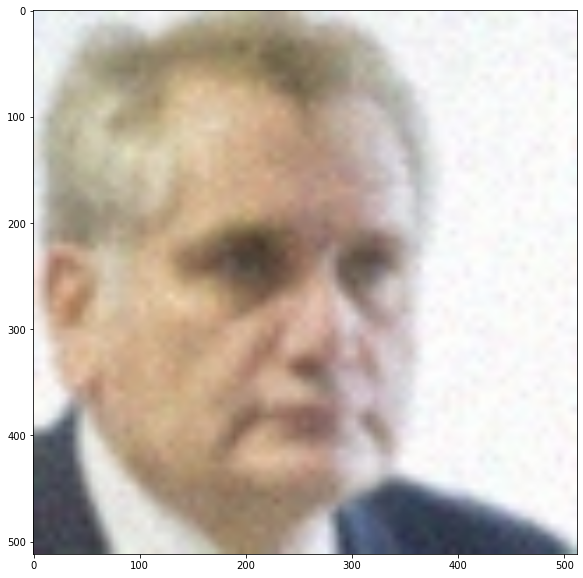

In [50]:
inimg = dataset[2][0]
showim(inimg)

In [51]:
inimg = inimg.to("cuda")
inimg = inimg.reshape(1, 3, 512, 512)

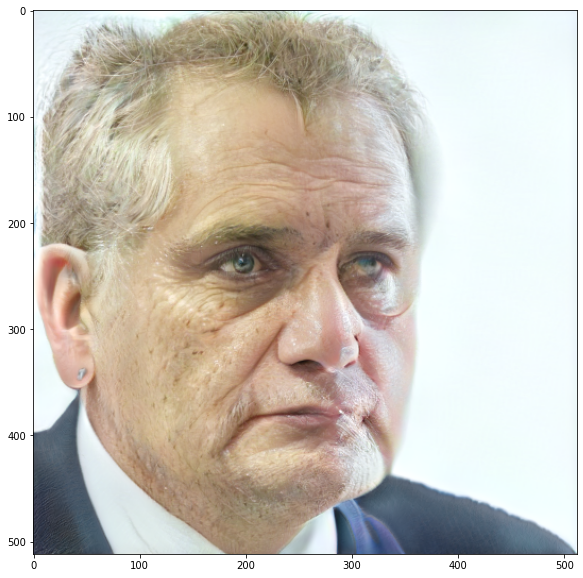

In [52]:
with torch.no_grad():
    output, _ = generator(inimg)
showim(output)

In [ ]:
noise = []
log_size = 9
names = ['ecd%d'%i for i in range(log_size-1)]
for i in range(log_size-1):
    ecd = getattr(generator, names[i])
    inputs = ecd(inputs)
    noise.append(inputs)
    #print(inputs.shape)
inputs = inputs.view(inputs.shape[0], -1)
outs = generator.final_linear(inputs)

In [ ]:
#print(outs.shape)
noise = list(itertools.chain.from_iterable(itertools.repeat(x, 2) for x in noise))[::-1]
outs = self.generator([outs], return_latents, inject_index, truncation, truncation_latent, input_is_latent, noise=noise[1:])

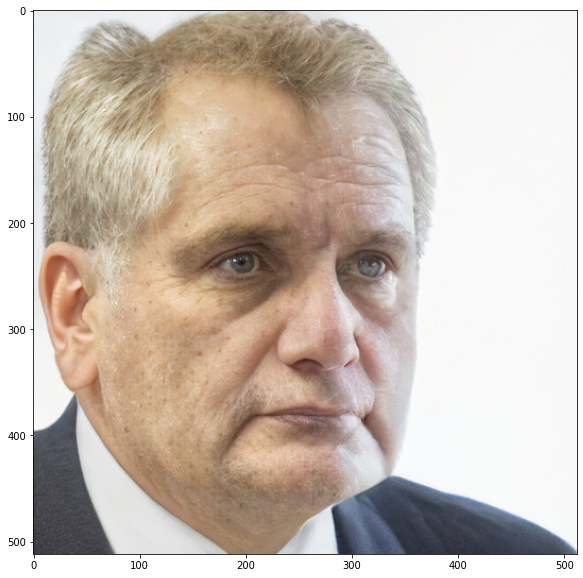

In [53]:
with torch.no_grad():
    output2, _ = generator2(inimg)
showim(output2)